<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/Statistics_in_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Measures of center**

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
5           6  Argentina          eggs        11.39         10.46
6           7  Argentina         dairy       195.08        277.87
7           8  Argentina         wheat       103.11         19.66
8           9  Argentina          rice         8.77         11.22
9          10  Argentina      soybeans         0.00          0.00

44.65
14.58


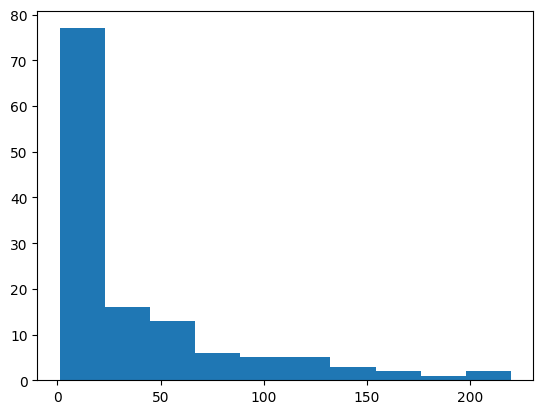


mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64



In [1]:
# Mean and median

# IMPORTING PACKAGES

import pandas as pd
import numpy as np

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/food_consumption.csv'

food_consumption = pd.read_csv(path)

# KNOW YOUR DATA

print(food_consumption.head(10))
print()

# MANIPULATING DATA

# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean consumption in USA
print(f"{np.mean(usa_consumption['consumption']):.2f}")

# Calculate median consumption in USA
print(np.median(usa_consumption['consumption']))

# MEAN AND MEDIAN VALUES ARE QUIET DIFFERENT. WE HAVE TO UNDERSTAND BETTER THE DATA

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()
print()

# THE CHART SHOWS THAT DATA IS NOT EQUALY DISTRIBUTED, THAT IS WHY MEAN AND MEDIAN ARE SO DIFFERENT.

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean', 'median']))
print()

# **Measures of spread**

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
5           6  Argentina          eggs        11.39         10.46
6           7  Argentina         dairy       195.08        277.87
7           8  Argentina         wheat       103.11         19.66
8           9  Argentina          rice         8.77         11.22
9          10  Argentina      soybeans         0.00          0.00

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.

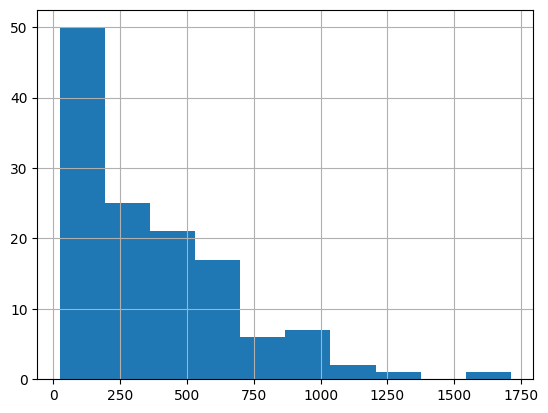

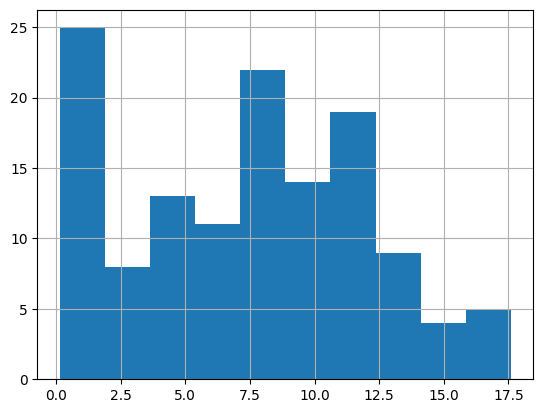

In [ ]:
# Variance and standard deviation

# IMPORTING PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/food_consumption.csv'

food_consumption = pd.read_csv(path)

# KNOW YOUR DATA

print(food_consumption.head(10))
print()

# MANIPULATING DATA

# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# IN THE CODE ABOVE, DATA IS GROUPED BY FOOD CATEGORY AND THEN VALUES OF VAR AND STD ARE PROVIDED TO CO2 EMISSIONS DATA FOR EACH GROUP

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

# THE DISTRIBUTION PLOT SHOWS THAT DATA FROM BEEF IS SKEWED WHILE THE DATA FROM EGGS IS BETTER SPREAD.

# **Quartiles, quantiles, and quintiles**

In [ ]:
# IMPORTING PACKAGES

import pandas as pd
import numpy as np

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/food_consumption.csv'

food_consumption = pd.read_csv(path)

# KNOW YOUR DATA

print(food_consumption.head(10))
print()

# MANIPULATING DATA

# QUARTILES SPLIT THE DATASET INTO 4 PIECES

# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))
print()
# [   0.        5.21     16.53     62.5975 1712.    ]
# THE RESULT SHOWS THAT 25% OF THE DATA IS BELOW 5.21
# HALF OF DATA IS BELOW AND ALSO ABOVE 16.53, WHICH IS ALSO THE MEDIAN

print(np.median(food_consumption['co2_emission']))
print()

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))
print()

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.1, 0.2, 0.3, 0.4,
                                                     0.5, 0.6, 0.7, 0.8,
                                                     0.9, 1]))
print()

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
5           6  Argentina          eggs        11.39         10.46
6           7  Argentina         dairy       195.08        277.87
7           8  Argentina         wheat       103.11         19.66
8           9  Argentina          rice         8.77         11.22
9          10  Argentina      soybeans         0.00          0.00

[   0.        5.21     16.53     62.5975 1712.    ]

16.53

[   0.       3.54    11.026   25.59    99.978 1712.   ]

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]



# **Finding outliers using IQR**

In [ ]:
# OUTLIER CALCULATION USING IQR AND BOXPLOT
# IMPORTING PACKAGES

import pandas as pd
import numpy as np

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/food_consumption.csv'

food_consumption = pd.read_csv(path)

# KNOW YOUR DATA

print(food_consumption.head(10))
print()

# MANIPULATING DATA

# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(sum)

print(emissions_by_country)
print()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]

print(outliers)

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
5           6  Argentina          eggs        11.39         10.46
6           7  Argentina         dairy       195.08        277.87
7           8  Argentina         wheat       103.11         19.66
8           9  Argentina          rice         8.77         11.22
9          10  Argentina      soybeans         0.00          0.00

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, d

<ipython-input-17-9e71cfd2c526>:21: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(sum)


# **What are the chances?**

In [ ]:
# IMPORTING PACKAGES

import pandas as pd
import numpy as np

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/amir_deals.csv'

amir_deals = pd.read_csv(path)

# KNOW YOUR DATA

print(amir_deals.head(10))
print()


# MANIPULATING DATA

# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)
print()


# Calculate probability of picking a deal with each product
probs = counts / counts.agg(sum)
print(probs)
print()

# Sampling deals

# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace = False)
print(sample_without_replacement)
print()

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)
print()


   Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17
5           6  Product B      New    Won  5496.27          2
6           7  Product C  Current    Won  3043.13         29
7           8  Product N  Current    Won  7340.64         13
8           9  Product F  Current    Won  6780.85         80
9          10  Product B  Current    Won  5237.24         23

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798

<ipython-input-28-0ff6b77f053d>:27: FutureWarning: The provided callable <built-in function sum> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  probs = counts / counts.agg(sum)


# **Discrete distributions**

  group_id  group_size
0        A           2
1        B           4
2        C           6
3        D           2
4        E           2
5        F           2
6        G           3
7        H           2
8        I           4
9        J           2



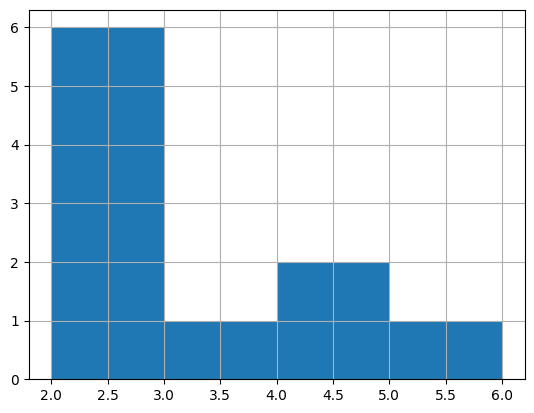


   group_size  prob
0           2     6
1           4     2
2           6     1
3           3     1

29
  group_id  group_size
1        B           4
2        C           6
8        I           4

0.30000000000000004


In [ ]:
# Creating a probability distribution

# IMPORTING PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/restaurant_groups.csv'

restaurant_groups = pd.read_csv(path)

# KNOW YOUR DATA

print(restaurant_groups)
print()

# MANIPULATING DATA

# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins = [2, 3, 4, 5, 6])
plt.show()
print()

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts()
# THE CALCULATION ABOVE INDICATES HOW MANY TIMES DOES A GROUP OF SIZE 2 APPEAR, OF SIZE 3, AND SO ON.

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)
print()

# CALCULATING EXPECTED VALUE OF SIZE DIST

# Calculate expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

# Subset groups of size 4 or more
groups_4_or_more = restaurant_groups[restaurant_groups['group_size'] >= 4]
print(groups_4_or_more)
print()
# SUBSET DONE SUCCESFULLY

# Sum the probabilities of selecting groups_4_or_more
prob_4_or_more =  np.sum(groups_4_or_more.groupby('group_id')['group_size'].value_counts() / restaurant_groups.shape[0])

print(prob_4_or_more)


# **Data back-ups**

0.16666666666666666

0.8333333333333334

0.3333333333333333

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.7

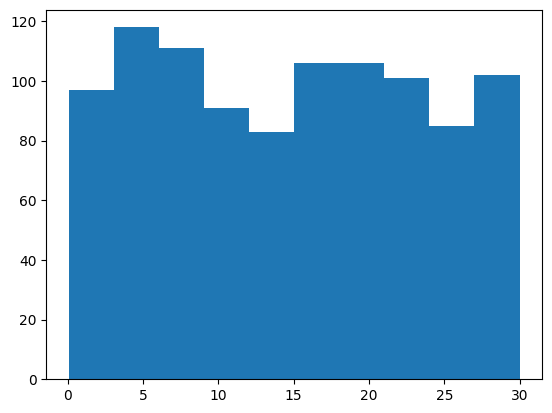

In [ ]:
# IMPORTING PACKAGES

import pandas as pd
import numpy as np
from scipy.stats import uniform

# Min and max wait times for back-up that happens every 30 min
min_time = 0

max_time = 30

# MANIPULATING DATA

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)
print()

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - prob_less_than_5
print(prob_greater_than_5)
print()

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)
print()

# Simulating wait times


# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size = 1000)
# THE CODE ABOVE SIMULATES THE WAIT TIME 1000 TIMES

print(wait_times)
print()

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()



# **Simulating sales deals**

In [ ]:
# Import binom from scipy.stats
from scipy.stats import binom
import numpy as np

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size= 1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size= 1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size= 52)

# Print mean deals won per week
print(deals.mean())
print()



# Calculating binomial probabilities

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)
# SYNTAX: binom.pmf(#successes, #trials, p(success))

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)
print()

# Probability of closing > 1 deal out of 3 deals
# SINCE WE DON'T HAVE A METHOD TO CALCULATE DIRECTLY THIS PROBABILITY, WE MUST
# USE THE CONCEPT OF COMPLEMENTARY PROBABILITY TO SOLVE IT

# P(close > 1) = 1 - P(close <= 1)

prob_greater_than_1 = 1 - prob_less_than_or_equal_1

print(prob_greater_than_1)
print()



# How many sales will be won?
# EXPECTED VALUE OF A BINOMIAL DISTRIBUTION IS n * p


# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)


[1]
[0]
0.8461538461538461

0.026999999999999996
0.784

0.21599999999999997

0.8999999999999999
0.75
1.0499999999999998


# **Distribution of Amir's sales**

   Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17
5           6  Product B      New    Won  5496.27          2
6           7  Product C  Current    Won  3043.13         29
7           8  Product N  Current    Won  7340.64         13
8           9  Product F  Current    Won  6780.85         80
9          10  Product B  Current    Won  5237.24         23



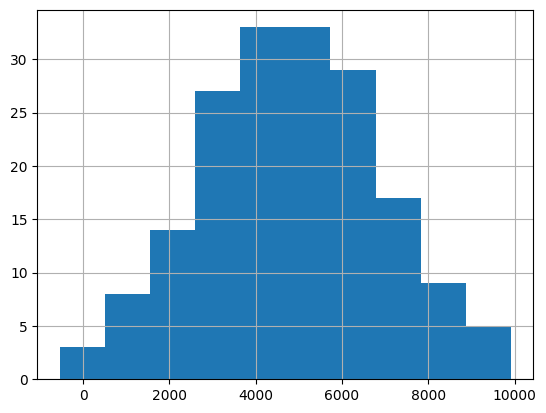


0.8943502263331446

0.9772498680518208

0.6826894921370859

3651.0204996078364



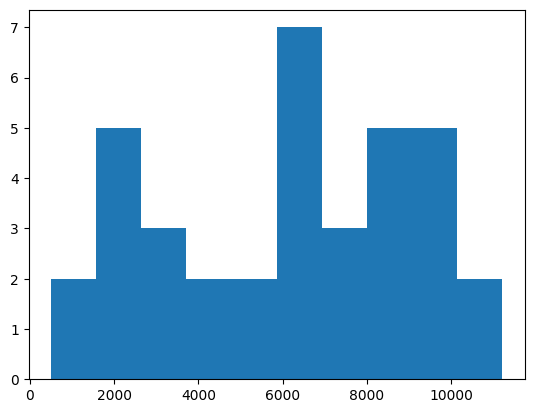

0.9772498680518208
0.9727648049862613
They are about the same


In [ ]:
# IMPORTING PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/amir_deals.csv'

amir_deals = pd.read_csv(path)

# KNOW YOUR DATA

print(amir_deals.head(10))
print()


# MANIPULATING DATA

# what kind of distribution the 'amount' variable follows.

# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins = 10)
plt.show()
print()

# Probabilities from the normal distribution

from scipy.stats import norm

# Probability of deal < 7500

prob_less_7500 = norm.cdf(7500, 5000, 2000)

# SINCE THE AREA BENEATH THE NORMAL CURVE IS 1, THE % OF DATA CALCULATED BY THE NORM METHOD GIVES DIRECTLY THE PROBABILITY OF AN EVENT

print(prob_less_7500)
print()

# Probability of deal > 1000
# SINCE THE NORM METHOD ONLY CALCULATES PROB OF LESS OR EQUAL THAN, WE HAVE TO USE COMPLEMENTARY PROBABILITY

prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)
print()

# Probability of deal between 3000 and 7000
# SINCE THE NORM METHOD ONLY CALCULATE PROB OF A VALUE BEING LESS OR EQUAL THAN, ME HAVE TO ADJUST: P(X<7000) - P(X<3000)

prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)
print()

# Calculate amount that 25% of deals will be less than
# TO CALCULATE PERCENTILE, WE USE THE METHOD NORM.PPF()

pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)
print()

# Simulating sales under new market conditions

# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()


# Which market is better?

#current:

print(1-norm.cdf(1000, 5000, 2000))
print(1-norm.cdf(1000, 6000, 2600))

print('They are about the same')




# **THE CENTRAL LIMIT THEOREM**

   Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17
5           6  Product B      New    Won  5496.27          2
6           7  Product C  Current    Won  3043.13         29
7           8  Product N  Current    Won  7340.64         13
8           9  Product F  Current    Won  6780.85         80
9          10  Product B  Current    Won  5237.24         23

   Unnamed:   0  product  num_users
0       0.0   1   3544.0       19.0
1       1.0   2   5073.0       43.0
2       2.0   3   6149.0       87.0
3       3.0   4   7863.0       83.0
4       4.0   5     14.0       17.0
5       5.0   6  10247.0        2.0
6       6.0   7   3544.0       29.0
7       7.0   8   5073.0       13.0
8   

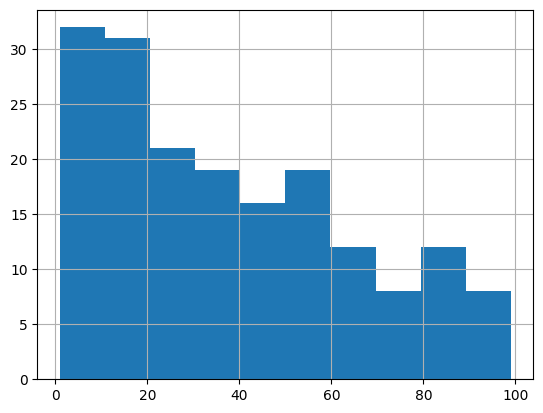

Printing the samples: 
69      2
142    17
166    11
127     7
8      80
100    48
112    12
119    37
25     16
141     8
3      83
8      80
142    17
59      6
69      2
81     43
24     31
137    89
159    29
79     22
Name: num_users, dtype: int64

32.0

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1, 38.6, 37.75, 41.6, 39.65, 38.65, 38.45, 31.15, 24.95, 37.15, 38.55, 34.55, 36.1, 46

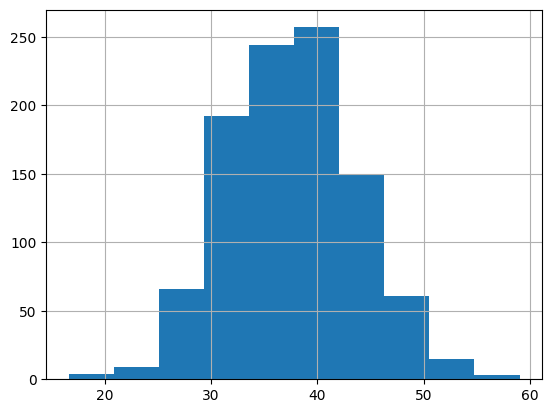

37.89333333333333
The mean above refers to the samples. It's easier to calculate mean over the samples rather than over the entire population.

37.651685393258425
This is the mean calculated over the entire population. Notice that there are no big differences. 


In [ ]:
# IMPORTING PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/amir_deals.csv'

amir_deals = pd.read_csv(path)

path2 = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/all_deals2.csv'

all_deals = pd.read_csv(path2)

# KNOW YOUR DATA

print(amir_deals.head(10))
print()

print(all_deals.head(10))
print()

# manipulating data

# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

# THE DISTRIBUTION OF THIS FEATURE IS RIGHT SKEWED

# SETTING THE SEED

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace = True)

# WE CAN CALL THE METHOD .sample() FROM THE SERIES TO MAKE SAMPLES
print('Printing the samples: ')
print(samp_20)
print()

# Take mean of samp_20
print(np.mean(samp_20))
print()

# CREATING A LIST TO STORE THE STATS VALUES

# THE MEAN VALUE OF THE 20 SAMPLES WILL BE STORED 100 TIMES INSIDE THE SAMPLE_MEANS LIST

# EXPLANATION: This will take 100 different samples (OF SIZE 20) and calculate the mean of each.

sample_means = []

# Loop 100 times
for i in range(0, 1000):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace = True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)

print(sample_means)
print()

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

# AS THE NUMBER OF TRIALS GROWS, THE PLOT TENDS TO A NORMAL DISTRIBUTION


# MAIN IDEA: CALCULATE STATISTICS OVER THE ENTIRE DISTRIBUTION MAY BE A DIFICULT WORK OR EVEN IMPOSSIBLE. THE IDEA IS TO CALCULATE STATISTICS OVER THE SAMPLES, AND THEN VERIFY THE NORMAL DISTRIBUTION THAT IT GIVES US, AND TAKE THE MEAN OF THE NORMAL DISTRIBUTION GENERATED

# The mean of means


# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(0, 30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace = True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))
print('The mean above refers to the samples. It\'s easier to calculate mean over the samples rather than over the entire population.')
print()

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))
print('This is the mean calculated over the entire population. Notice that there are no big differences. ')



# **POISSON DISTRIBUTION**
# **Tracking lead responses**

In [ ]:
# IMPORTING PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/amir_deals.csv'

amir_deals = pd.read_csv(path)

path2 = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/all_deals2.csv'

all_deals = pd.read_csv(path2)


# manipulating data

# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses (PROBABILITY OF A SINGLE VALUE)
# POISSON.PMF(VALUE, MEAN)
prob_5 = poisson.pmf(5, 4)

print('Probability of 5 responses: ')
print(prob_5)
print()

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print('Probability of 5 responses of the co-worker: ')
print(prob_coworker)
print()

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print('Probability of 2 or fewer responses: ')

print(prob_2_or_less)
print()

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print('Probability of > 10 responses: ')

print(prob_over_10)
print()

# Modeling time between leads

from scipy.stats import expon


# Print probability response takes < 1 hour
print(expon.cdf(1, scale= 2.5))
# he responds to 1 request every 2.5 hours

print()

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale= 2.5))
print()

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale= 2.5) - expon.cdf(3, scale= 2.5))
print()


Probability of 5 responses: 
0.1562934518505317

Probability of 5 responses of the co-worker: 
0.17140068409793663

Probability of 2 or fewer responses: 
0.23810330555354436

Probability of > 10 responses: 
0.0028397661205137315

0.3296799539643607


# **CORRELATION**

   Unnamed: 0      country  social_support  freedom  corruption  generosity  \
0           1      Finland             2.0      5.0         4.0        47.0   
1           2      Denmark             4.0      6.0         3.0        22.0   
2           3       Norway             3.0      3.0         8.0        11.0   
3           4      Iceland             1.0      7.0        45.0         3.0   
4           5  Netherlands            15.0     19.0        12.0         7.0   
5           6  Switzerland            13.0     11.0         7.0        16.0   
6           7       Sweden            25.0     10.0         6.0        17.0   
7           8  New Zealand             5.0      8.0         5.0         8.0   
8           9       Canada            20.0      9.0        11.0        14.0   
9          10      Austria            31.0     26.0        19.0        25.0   

   gdp_per_cap  life_exp  happiness_score  grams_sugar_per_day  
0        42400      81.8              155                 86.8  


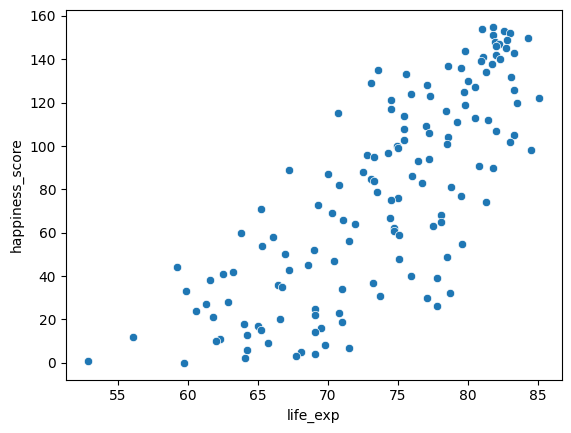

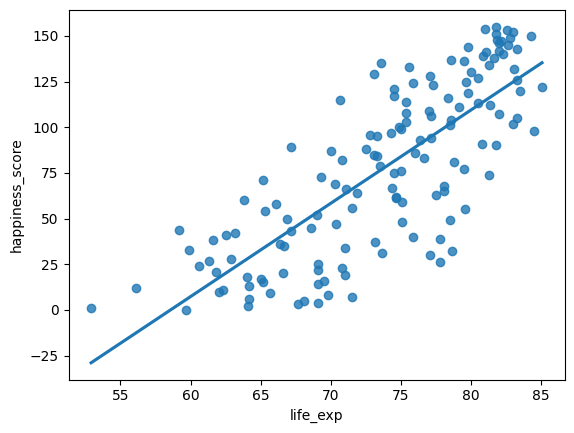

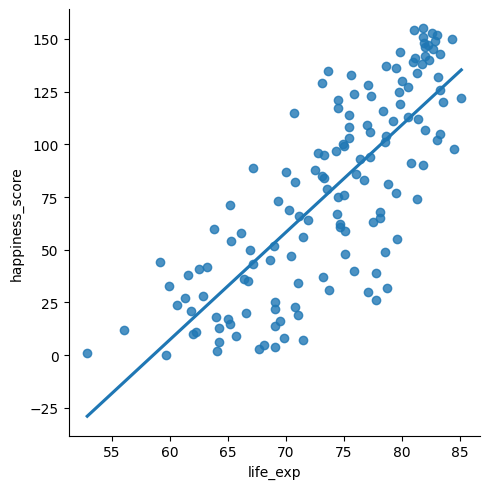


0.7802249053272062



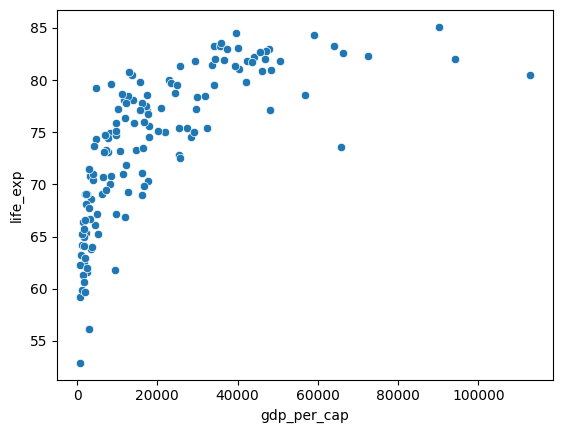


0.7019547642148012



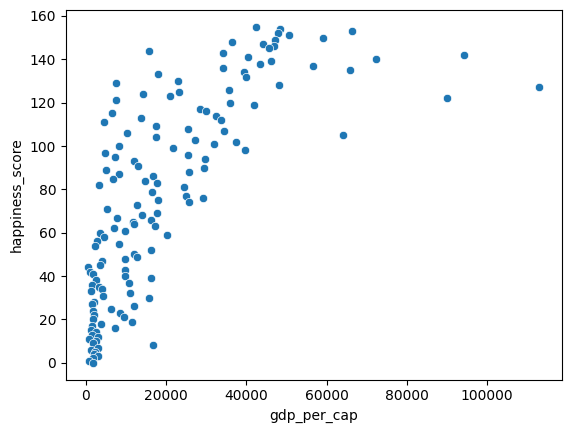

0.727973301222298



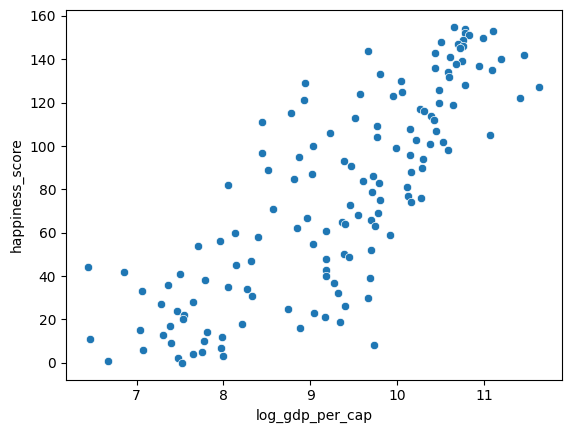


0.8043146004918288



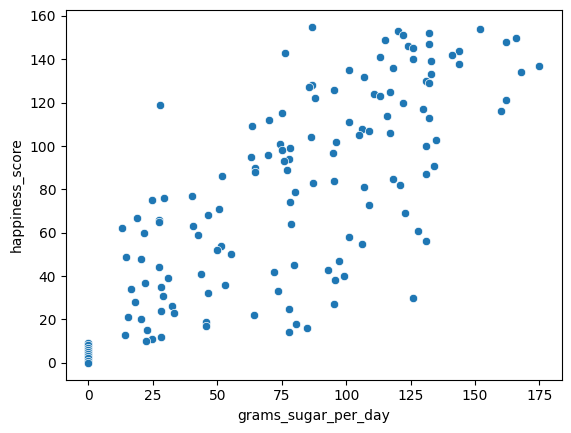


0.7555392878408179



In [ ]:
# IMPORTING PACKAGES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/world_happiness.csv'

world_happiness = pd.read_csv(path)

# KNOW YOUR DATA

print(world_happiness.head(10))

# MANIPULATING DATA

# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x = 'life_exp', y = 'happiness_score', data = world_happiness)

# Show plot
plt.show()

# NOW INCLUDING THE LINEAR TRENDLINE

# Create scatterplot of happiness_score vs life_exp with trendline
sns.regplot(x = 'life_exp', y = 'happiness_score', data = world_happiness, ci = None)
print()

# Show plot
plt.show()
print()

# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()
print()
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)
print()

# CORRELATION CAVEATS

# What can't correlation measure?

# explore one of the caveats of the correlation coefficient

# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x = 'gdp_per_cap', y = 'life_exp', data = world_happiness)

# Show plot
plt.show()
print()
# Correlation between gdp_per_cap and life_exp
cor2 = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor2)
print()

# The correlation coefficient can't account for any relationships that aren't linear, regardless of strength.


# TRANSFORMING VARIABLES TO APPLY CORRELATION!

# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x = 'gdp_per_cap', y = 'happiness_score', data = world_happiness)
plt.show()

# Calculate correlation
cor3 = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor3)
print()

# IT'S CLEAR THAT THE VARIABLES DON'T HAVE A LINEAR RELATIONSHIP. THUS, WE HAVE TO SOMEHOW LINEARIZE IT.

# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x = 'log_gdp_per_cap', y = 'happiness_score', data = world_happiness)
plt.show()
print()

# Calculate correlation
cor4 = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor4)
print()



# ANSWERING QUESTIONS!

# Does sugar improve happiness?


# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x = 'grams_sugar_per_day', y = 'happiness_score', data =  world_happiness)
plt.show()
print()
# Correlation between grams_sugar_per_day and happiness_score
cor5 = world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
print(cor5)
print()


# Design of experiments


# Experiments generally aim to answer a question in the form, "What is the effect of the treatment on the response?"

# TREATMENT: EXPLANATORY/INDEPENDENT VARIABLE (ADVERTISEMENT)
# RESPONSE: RESPONSE/DEPENDENT VARIABLE (PURCHASES)

# TREATMENT GROUP: SEES THE ADVERTISEMENT
# CONTROL GROUP: DOESN'T SEE THE AD.

# QUESTION: BY SEEING THE AD DO PEOPLE BUY MORE?



# **Introduction to Data Visualization with Matplotlib**

# **Plotting two variables**

         date     co2  relative_temp
0  1958-03-06  315.71           0.10
1  1958-04-06  317.45           0.01
2  1958-05-06  317.50           0.08
3  1958-06-06     NaN          -0.05
4  1958-07-06  315.86           0.06
5  1958-08-06  314.93          -0.06
6  1958-09-06  313.20          -0.03
7  1958-10-06     NaN           0.04
8  1958-11-06  313.33           0.02
9  1958-12-06  314.67           0.01


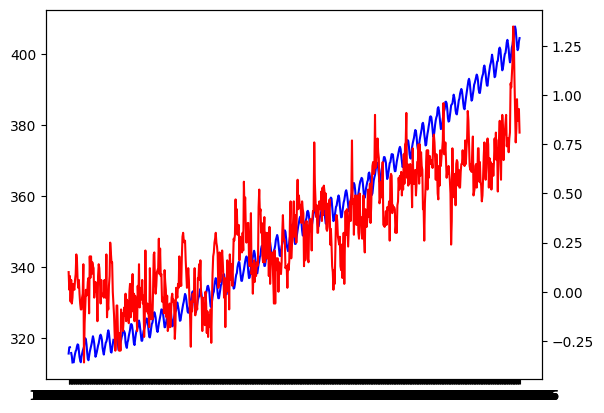

In [7]:
# If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

# IMPORTING PACKAGES

import matplotlib.pyplot as plt

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/climate_change.csv'

climate_change = pd.read_csv(path)

# KNOW YOUR DATA

print(climate_change.head(10))

climate_change = climate_change.set_index(climate_change['date'])

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()

## **Defining a function that plots time-series data**

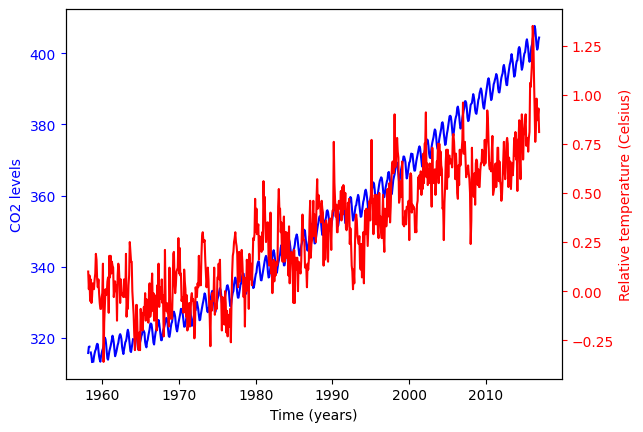

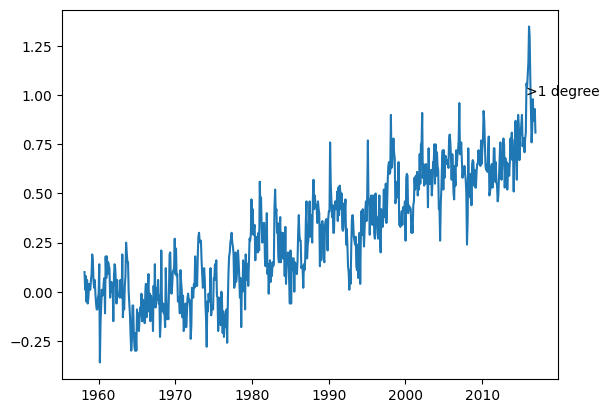

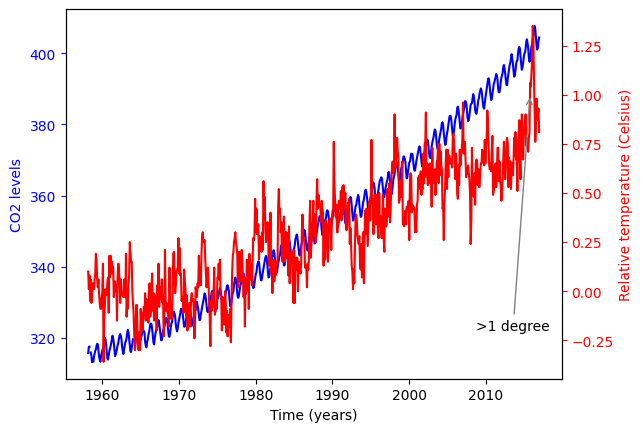

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
# IMPORTING PACKAGES

import matplotlib.pyplot as plt

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/climate_change.csv'


# READING FILES with date parsing
climate_change = pd.read_csv(path, parse_dates=['date'], index_col='date')


# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)


  # Using a plotting function

fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temperature (Celsius)')

plt.show()


# Annotating time-series data (pointing relevant information in the chart)
# annotate method

fig, ax2 = plt.subplots()

# Plot the relative temperature data
ax2.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax2.annotate('>1 degree', (pd.Timestamp('2015-10-06'), 1))

plt.show()

# Plotting time-series: putting it all together

fig, ax3 = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax3, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax4 = ax3.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax4, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temperature (Celsius)')

# Annotate point with relative temperature >1 degree

ax4.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={"arrowstyle":"->", "color":"gray"})



plt.show()


